In [1]:
from sklearn.manifold import SpectralEmbedding
from gensim.models import KeyedVectors
import numpy as np
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde
from sklearn.manifold import trustworthiness

In [2]:
!pip install pyamg

#Sklearn spectral embedding on swissroll dataset (10k)

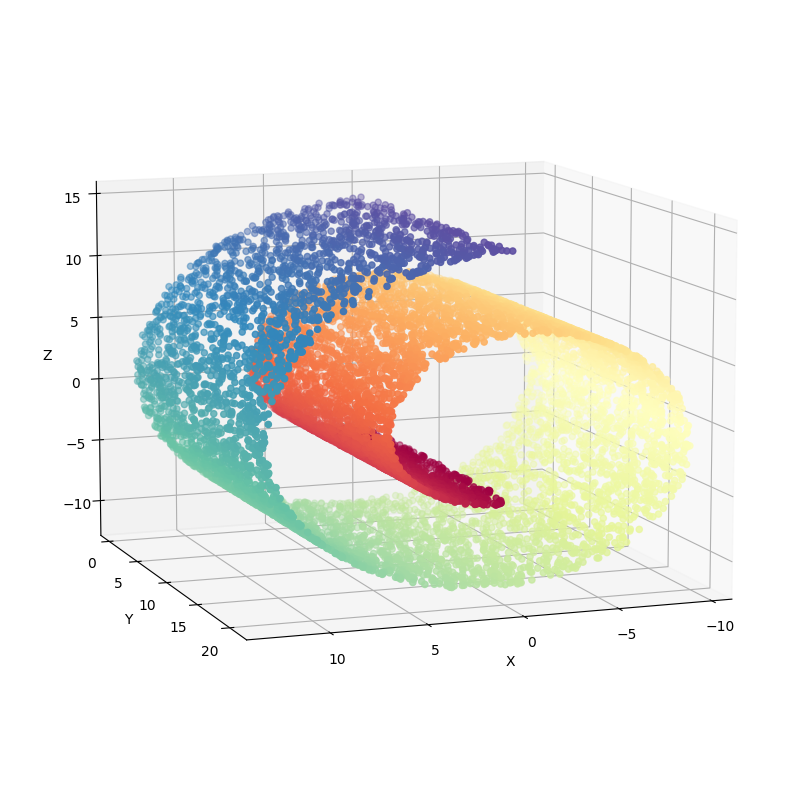

In [8]:
# Parameters
n_samples = 100000  # Number of samples in the Swiss roll dataset
sample_size = 10000  # Adjust based on computational capacity
eigen_solver = 'amg'
n_components = 2  # Target dimensionality for spectral embedding

# Generate the Swiss roll dataset
data, color = make_swiss_roll(n_samples,noise=0.0, random_state=3)

# Sample the data
indices = np.random.choice(n_samples, sample_size, replace=False)
sampled_data = data[indices]
sampled_color = color[indices]

# plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(sampled_data[:, 0], sampled_data[:, 1], sampled_data[:, 2], c=sampled_color, cmap=plt.cm.Spectral)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.view_init(10, 70)
plt.show()

In [ ]:
n_neighbors = 40
embedding = SpectralEmbedding(n_components=2, affinity='nearest_neighbors', n_neighbors=n_neighbors, random_state=3,eigen_solver=eigen_solver)
transformed_data = embedding.fit_transform(sampled_data)

<ipython-input-9-8aa119e32723>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(transformed_data[:, 0], transformed_data[:, 1], cmap=plt.cm.Spectral, marker='.', s=30)


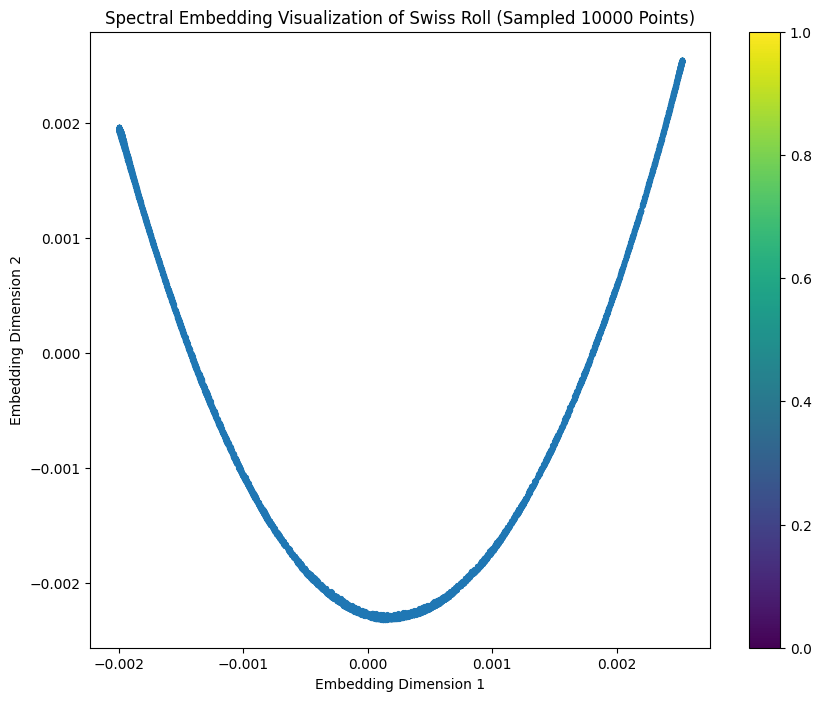

In [9]:
# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], cmap=plt.cm.Spectral, marker='.', s=30)
plt.title(f"Spectral Embedding Visualization of Swiss Roll (Sampled {sample_size} Points)")
plt.xlabel("Embedding Dimension 1")
plt.ylabel("Embedding Dimension 2")
plt.colorbar()
plt.show()

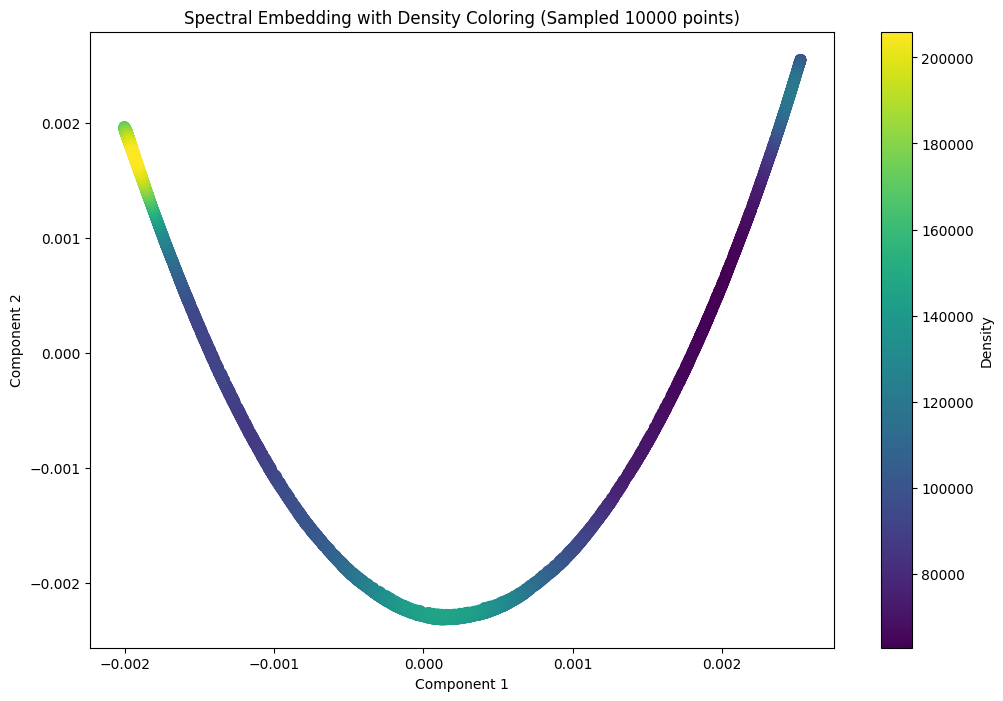

In [13]:
# Calculate the point density
xy = np.vstack([transformed_data[:, 0], transformed_data[:, 1]])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = transformed_data[:, 0][idx], transformed_data[:, 1][idx], z[idx]

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(x, y, c=z, s=50, edgecolor=None, cmap='viridis')
fig.colorbar(scatter, ax=ax, label='Density')
plt.title('Spectral Embedding with Density Coloring (Sampled 10000 points)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [11]:
# Calculate trustworthiness in batches
batch_size = 10000
trustworthiness_scores = []

for i in range(0, n_samples, batch_size):
    # Calculate end index of the batch, ensuring it doesn't go beyond the dataset
    end_index = min(i + batch_size, n_samples)

    # Extract the batch from the data
    data_batch = data[i:end_index]
    transformed_data_batch = transformed_data[i:end_index]

    # Check if the batch is not empty
    if data_batch.size > 0 and transformed_data_batch.size > 0:
        # Calculate trustworthiness for the current batch
        score = trustworthiness(data_batch, transformed_data_batch, n_neighbors=5)
        trustworthiness_scores.append(score)

# Calculate the overall trustworthiness score
overall_trustworthiness = np.mean(trustworthiness_scores) if trustworthiness_scores else 0
print(f'Overall Trustworthiness Score: {overall_trustworthiness}')

Overall Trustworthiness Score: 0.50011556244996


# Sklearn spectral embedding on swissroll dataset (100k) in neighbor affinity

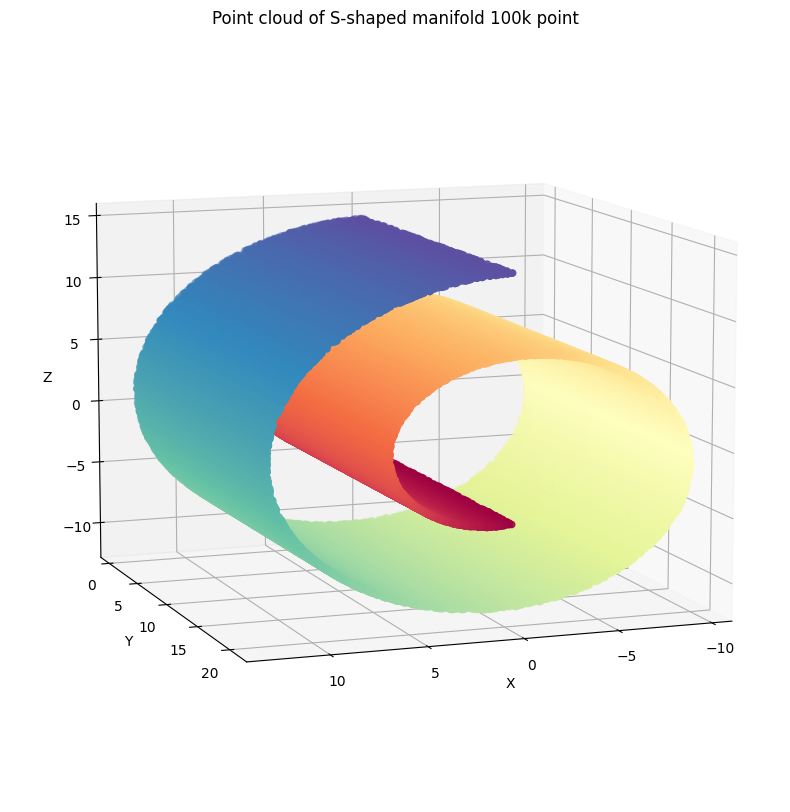

In [3]:
# Parameters
n_samples = 100000  # Number of samples in the Swiss roll dataset
sample_size = 100000

# Generate the Swiss roll dataset
X, color = make_swiss_roll(n_samples, noise=0.0, random_state=3)

# Sample the data
indices = np.random.choice(n_samples, sample_size, replace=False)
sampled_data = X[indices]
sampled_color = color[indices]

# plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(sampled_data[:, 0], sampled_data[:, 1], sampled_data[:, 2], c=sampled_color, cmap=plt.cm.Spectral)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Point cloud of S-shaped manifold 100k point")
ax.view_init(10, 70)

plt.show()

In [4]:
# Apply Spectral Embedding
eigen_solver='amg'
n_neighbors = 40
embedding = SpectralEmbedding(n_components=2, affinity='nearest_neighbors', n_neighbors=n_neighbors, random_state=3,eigen_solver=eigen_solver)
X_transformed = embedding.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:359: UserWarning: Exited at iteration 4 with accuracies 
[3.28925231e-16 5.76256003e-04 1.69000786e-03 1.08351135e-03]
not reaching the requested tolerance 0.0014901161193847656.
Use iteration 4 instead with accuracy 
0.0008374438033416411.

  _, diffusion_map = lobpcg(laplacian, X, M=M, tol=tol, largest=False)
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:359: UserWarning: Exited postprocessing with accuracies 
[5.18429412e-16 5.76256003e-04 1.69000786e-03 1.08351135e-03]
not reaching the requested tolerance 0.0014901161193847656.
  _, diffusion_map = lobpcg(laplacian, X, M=M, tol=tol, largest=False)


<ipython-input-5-3cd57bc6235b>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_transformed[:, 0], X_transformed[:, 1], cmap=plt.cm.Spectral, marker='.', s=30)


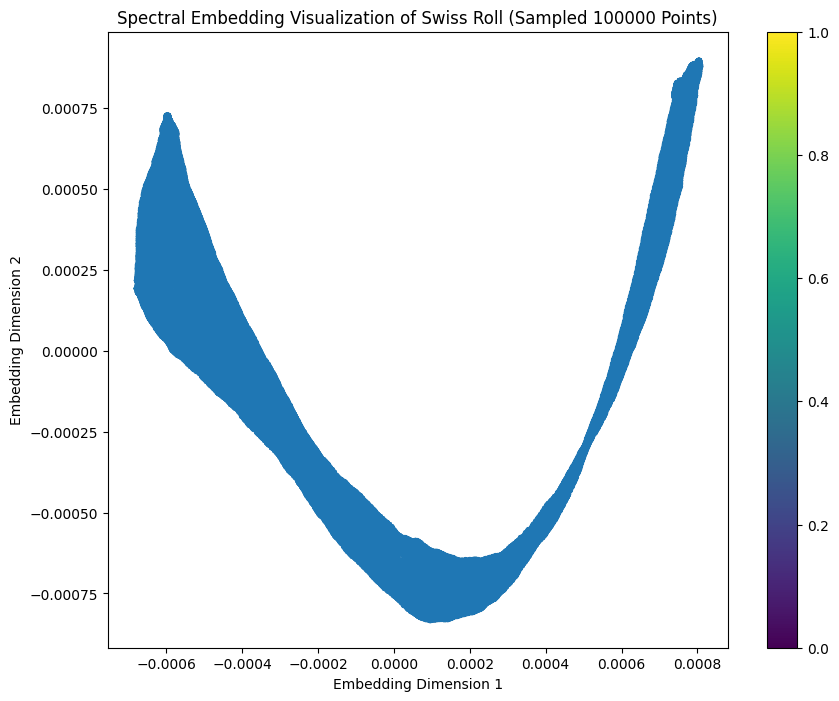

In [5]:
# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], cmap=plt.cm.Spectral, marker='.', s=30)
plt.title(f"Spectral Embedding Visualization of Swiss Roll (Sampled {sample_size} Points)")
plt.xlabel("Embedding Dimension 1")
plt.ylabel("Embedding Dimension 2")
plt.colorbar()
plt.show()

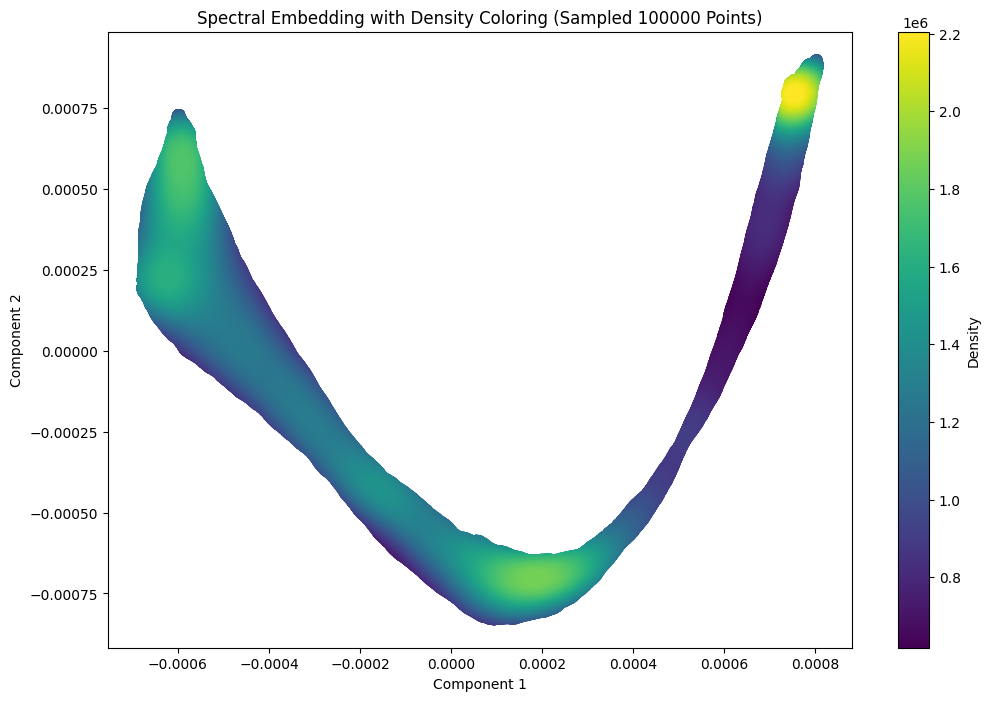

In [6]:
# Calculate the point density for the sampled data
xy = np.vstack([X_transformed[:, 0], X_transformed[:, 1]])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last for the sampled data
idx = z.argsort()
x, y, z = X_transformed[idx, 0], X_transformed[idx, 1], z[idx]

# Plot the sampled data with density coloring
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(x, y, c=z, s=50, edgecolor=None, cmap='viridis')
fig.colorbar(scatter, ax=ax, label='Density')
plt.title(f'Spectral Embedding with Density Coloring (Sampled {sample_size} Points)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [7]:
# Calculate trustworthiness in batches
batch_size = 10000
trustworthiness_scores = []

for i in range(0, n_samples, batch_size):
    # Calculate end index of the batch, ensuring it doesn't go beyond the dataset
    end_index = min(i + batch_size, n_samples)

    # Extract the batch from the data
    data_batch = X[i:end_index]
    transformed_data_batch = X_transformed[i:end_index]

    # Check if the batch is not empty
    if data_batch.size > 0 and transformed_data_batch.size > 0:
        # Calculate trustworthiness for the current batch
        score = trustworthiness(data_batch, transformed_data_batch, n_neighbors=5)
        trustworthiness_scores.append(score)

# Calculate the overall trustworthiness score
overall_trustworthiness = np.mean(trustworthiness_scores) if trustworthiness_scores else 0
print(f'Overall Trustworthiness Score: {overall_trustworthiness}')

Overall Trustworthiness Score: 0.9916529645716574


#word2vec

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the Word2Vec model
binary_file_path = '/content/drive/MyDrive/GoogleNews-vectors-negative300.bin'
word2vec_model = KeyedVectors.load_word2vec_format(binary_file_path, binary=True)

# word2vec 10k

In [ ]:
# Define the number of vectors to sample
num_vectors_to_sample = 10000
batch_size = 1000
trustworthiness_scores = []
target_mapping= []

# Randomly sample vectors from the loaded model
all_words = list(word2vec_model.index_to_key)
selected_words = np.random.choice(all_words, num_vectors_to_sample, replace=False)
selected_vectors = [word2vec_model[word] for word in selected_words]

In [ ]:
# Initialize the SpectralEmbedding model
n_components = 2  # Number of dimensions for embedding

spectral_embedding = SpectralEmbedding(n_components=n_components, eigen_solver=eigen_solver)

# Create an empty array to store the embedded data
embedded_data = np.empty((num_vectors_to_sample, n_components))

In [ ]:

# Process the data in batches
for i in range(0, num_vectors_to_sample, batch_size):
    batch_words = selected_words[i:i + batch_size]
    batch_vectors = np.array([word2vec_model[word] for word in batch_words if word in word2vec_model])

    # Only proceed if batch_vectors is not empty
    if batch_vectors.shape[0] > 0:
        batch_embedded_data = spectral_embedding.fit_transform(batch_vectors)
        embedded_data[i:i + batch_size, :] = batch_embedded_data[:len(batch_vectors), :]  # Handle last batch case

        # Ensure batch_target_mapping is aligned with your batches and has correct shape
        batch_target_mapping = target_mapping[i:i + batch_size]

        # Validate shapes before calling trustworthiness
        if batch_embedded_data.shape[0] > 1:  # trustworthiness requires at least 2 samples
            trustworthiness_score = trustworthiness(batch_vectors, batch_embedded_data)
            trustworthiness_scores.append(trustworthiness_score)

# Calculate overall trustworthiness
if trustworthiness_scores:  # Ensure the list is not empty
    overall_trustworthiness = np.mean(trustworthiness_scores)
    print(f'Overall Trustworthiness Score: {overall_trustworthiness}')
else:
    print('No data was processed, unable to calculate trustworthiness.')

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:359: UserWarning: Exited at iteration 20 with accuracies 
[3.91716626e-15 2.59770170e-06 4.29063569e-06 4.69745470e-05]
not reaching the requested tolerance 1.4901161193847656e-05.
Use iteration 21 instead with accuracy 
1.3465721105298324e-05.

  _, diffusion_map = lobpcg(laplacian, X, M=M, tol=tol, largest=False)
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:359: UserWarning: Exited postprocessing with accuracies 
[3.87906574e-15 2.59770170e-06 4.29063569e-06 4.69745470e-05]
not reaching the requested tolerance 1.4901161193847656e-05.
  _, diffusion_map = lobpcg(laplacian, X, M=M, tol=tol, largest=False)
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:359: UserWarning: Exited at iteration 20 with accuracies 
[3.85228855e-15 1.16271311e-06 1.97479149e-06 1.70670418e-04]
not reaching the requested tolerance 1.4901161193847656e-05.
Use iterati

Overall Trustworthiness Score: 0.5684697983870967


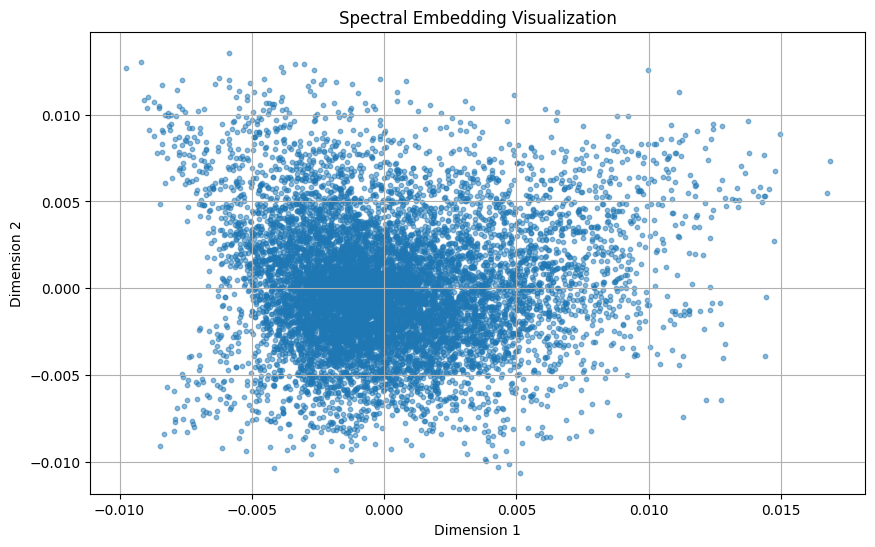

In [ ]:
# Assuming 'embedded_data' contains the 2D embedded vectors
x = embedded_data[:, 0]
y = embedded_data[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=10, alpha=0.5)  # Customize point size and transparency
plt.title('Spectral Embedding Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()


#word2vec 100k

In [ ]:
# Define the number of vectors to sample
num_vectors_to_sample = 100000
batch_size = 10000
trustworthiness_scores = []
target_mapping= []

# Randomly sample vectors from the loaded model
all_words = list(word2vec_model.index_to_key)
selected_words = np.random.choice(all_words, num_vectors_to_sample, replace=False)
selected_vectors = [word2vec_model[word] for word in selected_words]

In [ ]:
# Initialize the SpectralEmbedding model
n_components = 2  # Number of dimensions for embedding

spectral_embedding = SpectralEmbedding(n_components=n_components, eigen_solver=eigen_solver)

# Create an empty array to store the embedded data
embedded_data = np.empty((num_vectors_to_sample, n_components))

In [ ]:

# Process the data in batches
for i in range(0, num_vectors_to_sample, batch_size):
    batch_words = selected_words[i:i + batch_size]
    batch_vectors = np.array([word2vec_model[word] for word in batch_words if word in word2vec_model])

    # Only proceed if batch_vectors is not empty
    if batch_vectors.shape[0] > 0:
        batch_embedded_data = spectral_embedding.fit_transform(batch_vectors)
        embedded_data[i:i + batch_size, :] = batch_embedded_data[:len(batch_vectors), :]  # Handle last batch case

        # Ensure batch_target_mapping is aligned with your batches and has correct shape
        batch_target_mapping = target_mapping[i:i + batch_size]

        # Validate shapes before calling trustworthiness
        if batch_embedded_data.shape[0] > 1:  # trustworthiness requires at least 2 samples
            trustworthiness_score = trustworthiness(batch_vectors, batch_embedded_data)
            trustworthiness_scores.append(trustworthiness_score)

# Calculate overall trustworthiness
if trustworthiness_scores:  # Ensure the list is not empty
    overall_trustworthiness = np.mean(trustworthiness_scores)
    print(f'Overall Trustworthiness Score: {overall_trustworthiness}')
else:
    print('No data was processed, unable to calculate trustworthiness.')

Overall Trustworthiness Score: 0.5682568316653323


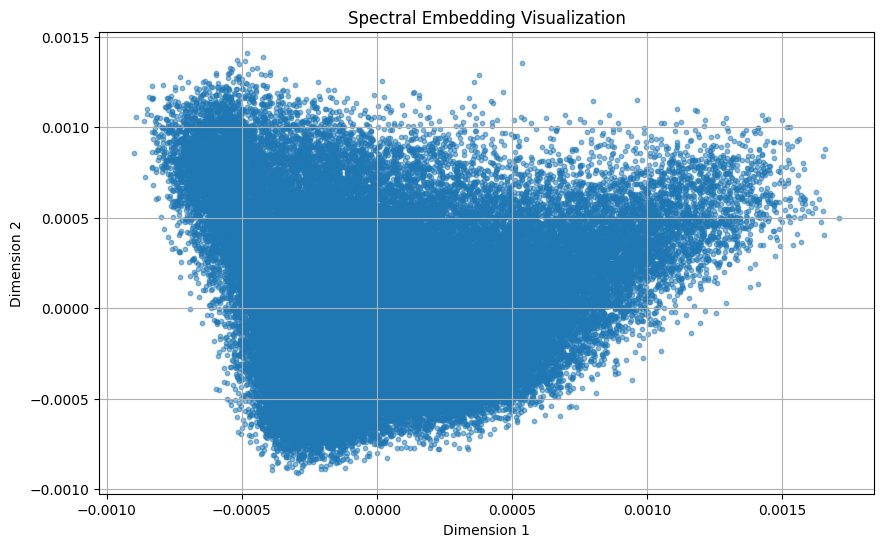

In [ ]:
# Assuming 'embedded_data' contains the 2D embedded vectors
x = embedded_data[:, 0]
y = embedded_data[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=10, alpha=0.5)  # Customize point size and transparency
plt.title('Spectral Embedding Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()
